In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  # For Plotly Express, which is easy-to-use for quick visualizations
import plotly.graph_objects as go 

In [2]:
from functions import concatenate_eurostat_countries, cleaning_eurostat_data_for_viz, clean_countries_numbeo, clean_cities
eurostat_df = concatenate_eurostat_countries()


eurostat_df

,Country,2019,2020,2021,2022,2023
Housing,DE,128.70,138.70,154.80,162.60,148.80
Housing,FR,110.86,116.62,123.98,131.82,131.26
Housing,PT,141.88,154.33,168.84,190.17,205.76
Rental,DE,100.67,101.06,101.92,102.60,104.78
Rental,FR,107.97,110.76,101.92,115.79,121.05
Rental,PT,106.10,107.60,109.00,110.80,113.10
Income,DE,26105.00,29896.00,29106.00,28569.00,30308.00
Income,FR,26210.00,25382.00,26075.00,26419.00,27577.00
Income,PT,11786.00,12696.00,13113.00,13148.00,14368.00


In [28]:
apt_buying = pd.read_excel("../data/raw/Apartment buying cost over time.xlsx", sheet_name = 1)
apt_buying.rename(columns = {"Unnamed: 0" : "city".lstrip()}, inplace = True)

buying_one_br = apt_buying.drop(range(3,7))

buying_one_br.columns = buying_one_br.columns.str.strip()
buying_one_br.columns = [col.split()[0] for col in buying_one_br.columns]


monthly_salary = pd.read_excel("../data/raw/numbeo_stats.xlsx", sheet_name = 0)
monthly_salary.fillna(method='ffill', inplace=True)
monthly_salary.rename(columns = {"City" : "city".lstrip()}, inplace = True)
monthly_salary["city"] = [value.lower() for value in monthly_salary["city"]]


monthly_salary = monthly_salary.drop(range(3,6))
monthly_salary =monthly_salary.drop(range(6,9))

buying_one_br = buying_one_br.round(2)

buying_one_br

# Check column names in the buying_one_br dataframe


C:\Users\manht\AppData\Local\Temp\ipykernel_16472\707356763.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_salary.fillna(method='ffill', inplace=True)


,city,2019,2020,2021,2022,2023,2024
0,Lisbon 1br,940.91,958.12,1054.79,1321.22,1137.77,1295.57
1,Berlin 1br,1522.45,1472.30,1689.52,2071.55,2003.01,1937.36
2,Paris 1 br,1918.05,2032.62,2086.78,2076.73,1974.07,2055.01


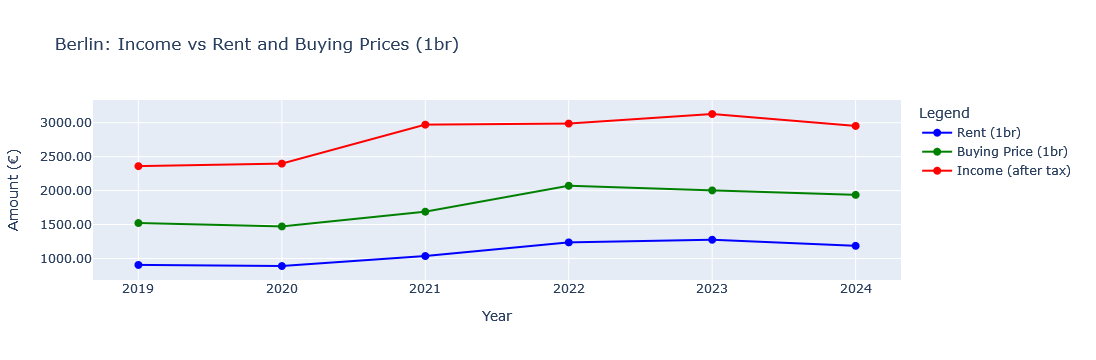

In [38]:

# Filter the data for Berlin
berlin_rent = monthly_salary[(monthly_salary['city'] == 'berlin') & (monthly_salary['Unnamed: 0'] == '1 bed apartment (rent)')]
berlin_salary = monthly_salary[(monthly_salary['city'] == 'berlin') & (monthly_salary['Unnamed: 0'] == 'Av salary (after tax)')]
berlin_buying = buying_one_br[buying_one_br['city'] == 'berlin 1br']

# Extract year columns and corresponding values for plotting
years = ['2019', '2020', '2021', '2022', '2023', '2024']
berlin_rent_values = berlin_rent[years].values.flatten()
berlin_salary_values = berlin_salary[years].values.flatten()
berlin_buying_values = berlin_buying[years].values.flatten()

# Create a plotly figure with two line graphs: income vs rent and income vs buying price
fig = go.Figure()

# Plot income vs rent for Berlin
fig.add_trace(go.Scatter(
    x=years, y=berlin_rent_values, mode='lines+markers', name='Rent (1br)',
    line=dict(color='blue', width=2),
    marker=dict(size=8, color='blue')
))

# Plot income vs buying price for Berlin
fig.add_trace(go.Scatter(
    x=years, y=berlin_buying_values, mode='lines+markers', name='Buying Price (1br)',
    line=dict(color='green', width=2),
    marker=dict(size=8, color='green')
))

# Plot income (after tax) for Berlin
fig.add_trace(go.Scatter(
    x=years, y=berlin_salary_values, mode='lines+markers', name='Income (after tax)',
    line=dict(color='red', width=2),
    marker=dict(size=8, color='red')
))

# Customize the layout of the figure
fig.update_layout(
    title="Berlin: Income vs Rent and Buying Prices (1br)",
    xaxis_title="Year",
    yaxis_title="Amount (€)",
    legend_title="Legend",
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickformat=".2f")
)

# Show the plot
fig.show()


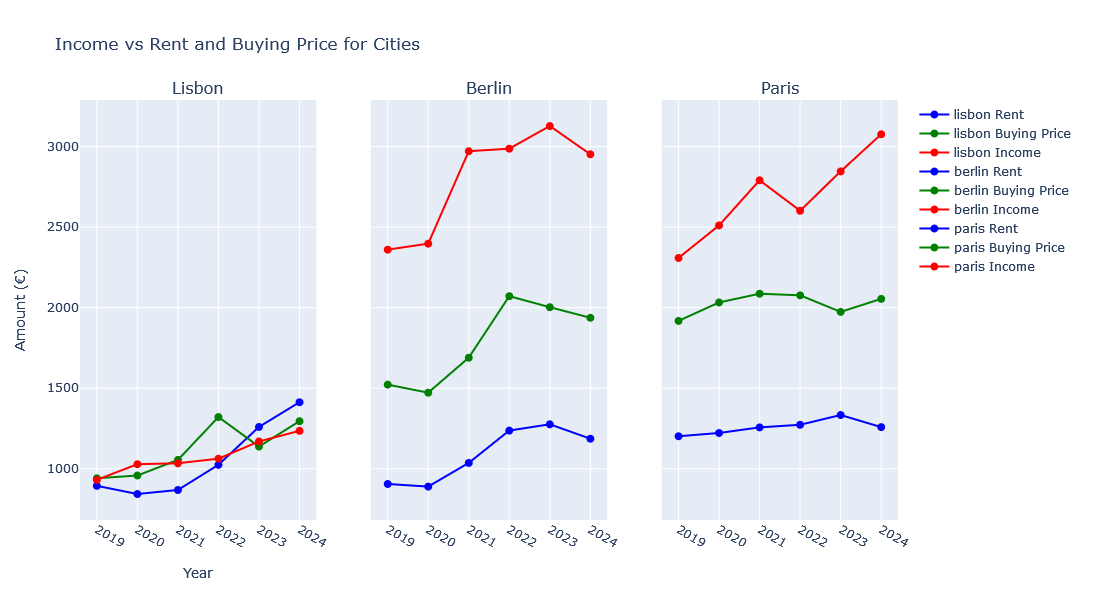

In [52]:
# Strip the '1br' or '1 br' from city names in buying_one_br for matching
buying_one_br["city"] = buying_one_br["city"].str.extract(r'([a-zA-Z]+)')[0].str.lower()

# Create a subplot grid: 1 row, 3 columns (one for each city)
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=["Lisbon", "Berlin", "Paris"], 
    shared_yaxes=True,
    vertical_spacing=0.1
)

# Function to plot the data for each city
def plot_city_data(city_name, row, col):
    # Filter the data for the specific city
    rent_data = monthly_salary[(monthly_salary['city'] == city_name) & (monthly_salary['Unnamed: 0'] == '1 bed apartment (rent)')]
    salary_data = monthly_salary[(monthly_salary['city'] == city_name) & (monthly_salary['Unnamed: 0'] == 'Av salary (after tax)')]
    buying_data = buying_one_br[buying_one_br['city'] == f"{city_name}"]

    # Extract year columns and corresponding values
    years = ['2019', '2020', '2021', '2022', '2023', '2024']
    rent_values = rent_data[years].values.flatten()
    salary_values = salary_data[years].values.flatten()
    buying_values = buying_data[years].values.flatten()

    # Plot rent vs salary for the city
    fig.add_trace(go.Scatter(
        x=years, y=rent_values, mode='lines+markers', name=f'{city_name} Rent',
        line=dict(color='blue', width=2),
        marker=dict(size=8, color='blue')
    ), row=row, col=col)
    
    # Plot buying price vs salary for the city
    fig.add_trace(go.Scatter(
        x=years, y=buying_values, mode='lines+markers', name=f'{city_name} Buying Price',
        line=dict(color='green', width=2),
        marker=dict(size=8, color='green')
    ), row=row, col=col)
    
    # Plot income (after tax) for the city
    fig.add_trace(go.Scatter(
        x=years, y=salary_values, mode='lines+markers', name=f'{city_name} Income',
        line=dict(color='red', width=2),
        marker=dict(size=8, color='red')
    ), row=row, col=col)

# Plot data for each city in the respective subplot
plot_city_data('lisbon', 1, 1)
plot_city_data('berlin', 1, 2)
plot_city_data('paris', 1, 3)

# Update layout of the figure
fig.update_layout(
    title="Income vs Rent and Buying Price for Cities",
    xaxis_title="Year",
    yaxis_title="Amount (€)",
    showlegend=True,
    height=600,
    width=1000,
)

# Show the plot
fig.show()
